<a href="https://colab.research.google.com/github/ej-emjiang/DIMe/blob/main/roku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries...

In [ ]:
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
drive.mount('/content/gdrive', force_remount = True)
%cd /content/gdrive/My Drive/DIME/roku

Mounted at /content/gdrive
/content/gdrive/My Drive/DIME/roku


Compiling files into two dataframes, based on whether the data is recorded by month or by day

In [ ]:
filenames = [
    'ave_minutes___visitor',
    'average_daily_visitors',
    'new_installs',
    'total_hours_streamed',
    'uninstalls'
]

colNames = [
    'Average Minutes Streamed per Viewer',
    'Avg Daily Viewers',
    'Agg Channel Metrics Time Grain Account Channel Installs',
    'Agg Channel Metrics Time Grain Hours Streamed',
    'Agg Channel Metrics Time Grain Account Channel Uninstalls'
]

In [ ]:
monthlyData = pd.DataFrame(
    data = {
        'monthName': [
            'jun22', 'jul22',
            'aug22', 'sept22',
            'oct22', 'nov22',
            'dec22', 'jan23',
            'feb23', 'mar23',
            'apr23', 'may23',
            'jun23'
        ]
    },
    columns = [
        'monthName', 'avgMinPerVisitor',
        'avgDailyVisitors', 'newInstalls',
        'totHoursStreamed', 'uninstalls'
    ]
)

for month in range(13):
  for col in range(1, len(monthlyData.columns)):
    monthlyData.loc[month, monthlyData.columns[col]] = (
        pd.read_csv(
f'''dashboard-channel_engagement-{month+1}/dashboard-channel_engagement-{month+1}/{filenames[col-1]}.csv''')
        .loc[0, colNames[col-1]]
    )
monthlyData['netInstalls'] = monthlyData[['newInstalls', 'uninstalls']].apply(
    lambda x: x[0] - x[1], axis = 1
)
monthlyData.head()

,monthName,avgMinPerVisitor,avgDailyVisitors,newInstalls,totHoursStreamed,uninstalls,netInstalls
0,jun22,25.75,0,3,2,4,-1
1,jul22,18.75,0,6,1,4,2
2,aug22,0.0,0,1,0,3,-2
3,sept22,30.0,0,6,4,3,3
4,oct22,59.75,0,10,8,3,7


In [ ]:
filenames = [
    'install_base_growth',
    'cumulative_net_installs',
    'channel_visitors_and_streaming_viewers',
    'channel_visitors_and_streaming_viewers',
    'channel_visitors_and_streaming_viewers',
    'install_base_growth',
    'minutes_streamed',
    'minutes_streamed',
]

colNames = [
    'Agg Channel Metrics Time Grain Date Key Date', 'Agg Channel Metrics Time Grain Account Installs Todate Sum',
    'Visitors', 'Viewers', 'Bounce Rate',
    'Net Installs',
    'Total Minutes Streamed', 'Average Minutes per Streaming Account'
]
columns = [
    'date', 'cumInstalls',
    'visitors', 'viewers', 'bounceRate',
    'netInstalls',
    'totMinutesStreamed', 'avgMinutesStreamedPerAccount'
]

In [ ]:
dailyData = pd.DataFrame()

for month in range(13):
  temp = pd.DataFrame()
  for col in range(len(colNames)):
    # use .join based off of date
    # then concat to merge with the overall dailyData IG
    filename = f"dashboard-channel_engagement-{month+1}/dashboard-channel_engagement-{month+1}/{filenames[col]}.csv"
    # print(filename)
    if col == 0:
      temp[colNames[0]] = pd.read_csv(filename).loc[:, colNames[col]]
    else:
      # print(pd.read_csv(filename)[[colNames[col]]])
      temp = temp.merge(right=pd.read_csv(filename)[[colNames[0], colNames[col]]][::-1],
                on = colNames[0], how = 'right')
  dailyData = pd.concat((dailyData, temp), axis = 0)
dailyData.reset_index(inplace = True, drop = True)
dailyData.rename(inplace = True, columns = dict(zip(colNames, columns)))
dailyData.fillna(value = 0, inplace = True) # note that NaNs are when no one actually streams ): or visits
dailyData.head()


,date,cumInstalls,visitors,viewers,bounceRate,netInstalls,totMinutesStreamed,avgMinutesStreamedPerAccount
0,2022-06-01,165,1,0,100.000%,0,0,0.0
1,2022-06-02,165,1,0,100.000%,-1,0,0.0
2,2022-06-03,165,1,1,0.000%,0,0,0.0
3,2022-06-04,165,0,0,0,0,0,0.0
4,2022-06-05,165,0,0,0,0,0,0.0


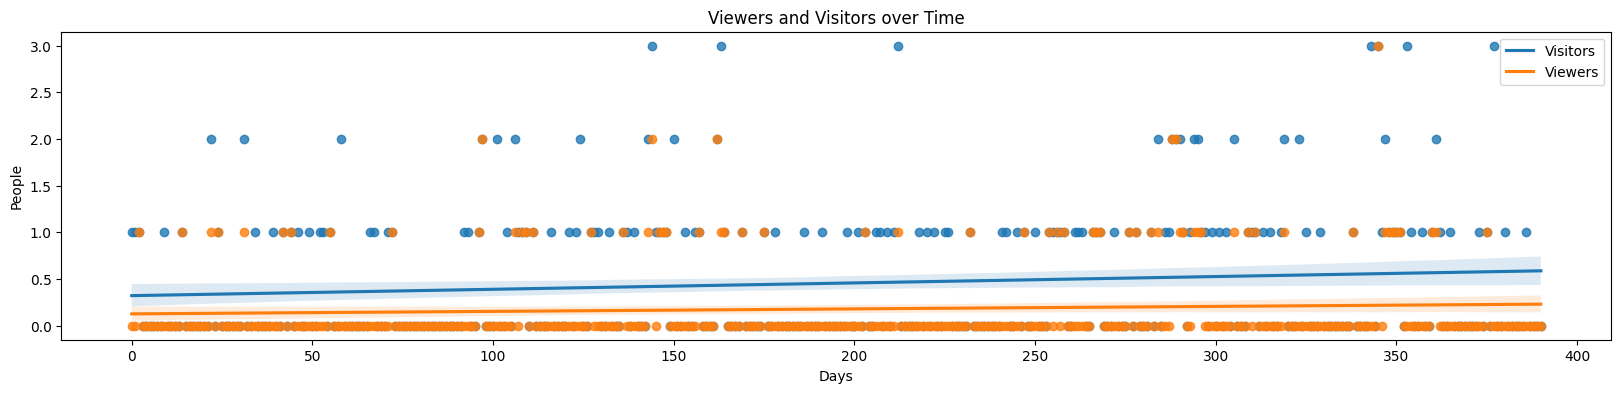

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20, 4))
sns.regplot(data = dailyData, x = dailyData.index, y = 'visitors', ax = ax)
sns.regplot(data = dailyData, x = dailyData.index, y = 'viewers', ax = ax)
ax.legend(labels = ['Visitors', 'Viewers'], handles = ax.lines, loc = 'best')
ax.set(title = 'Viewers and Visitors over Time', ylabel = 'People', xlabel = 'Days');

<Axes: ylabel='visitors'>

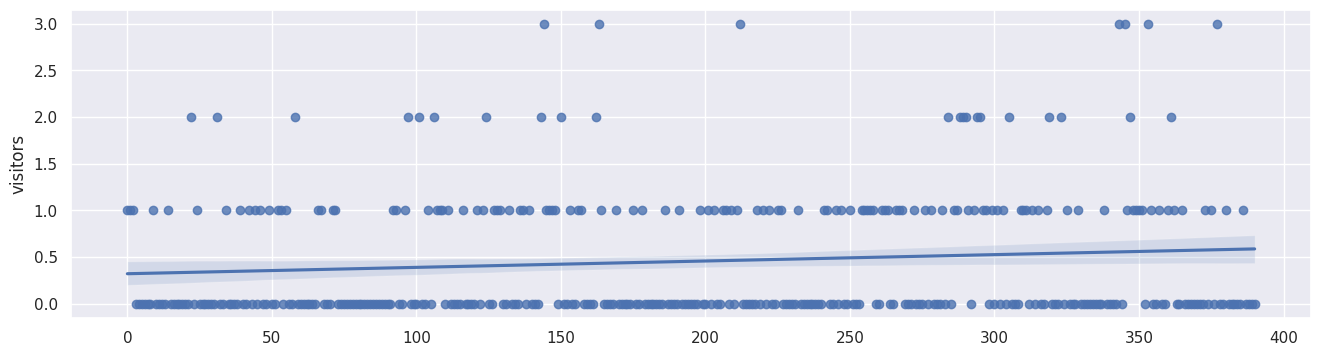

In [ ]:
sns.regplot(data = dailyData, x = dailyData.index, y ='visitors')

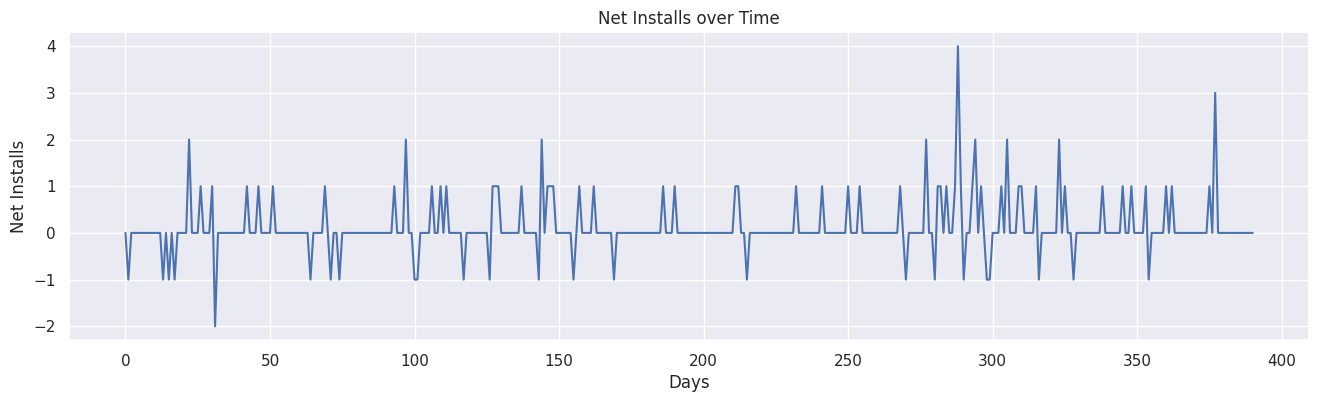

In [ ]:
sns.set(rc={"figure.figsize":(16, 4)})
ax = sns.lineplot(data = dailyData, x = dailyData.index, y = 'netInstalls')
ax.set(title = "Net Installs over Time", xlabel="Days", ylabel = "Net Installs");

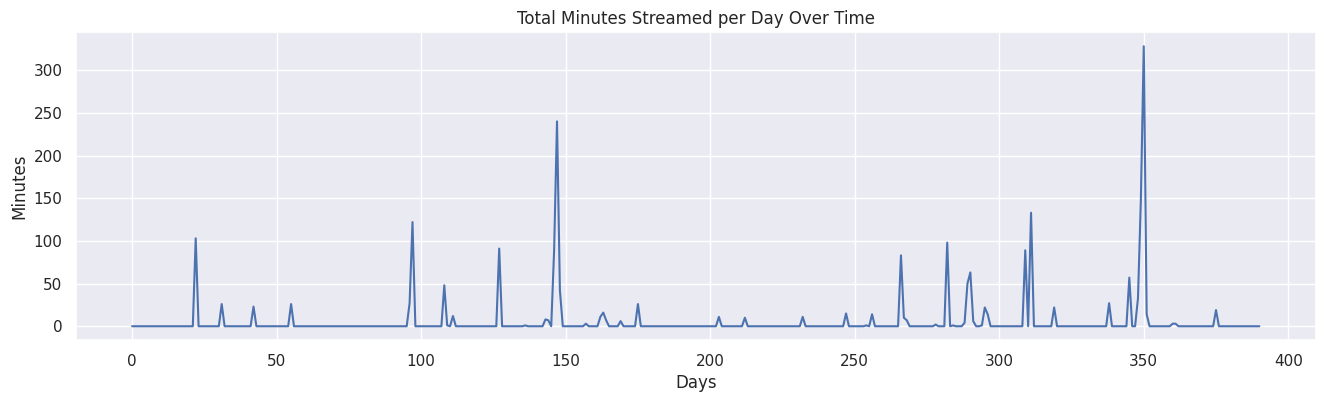

In [ ]:
ax = sns.lineplot(data = dailyData, x = dailyData.index, y = 'totMinutesStreamed')
ax.set(title = "Total Minutes Streamed per Day Over Time", xlabel = "Days", ylabel = "Minutes");

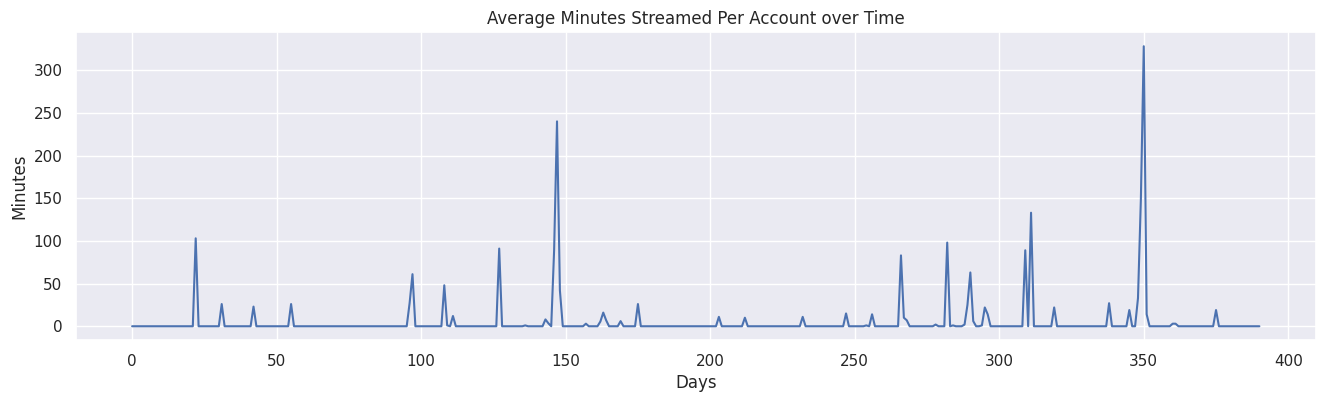

In [ ]:
ax = sns.lineplot(data = dailyData, x = dailyData.index, y = 'avgMinutesStreamedPerAccount')
ax.set(title = "Average Minutes Streamed Per Account over Time", xlabel = "Days", ylabel = "Minutes");

# Aw yeah it's monthly data time.

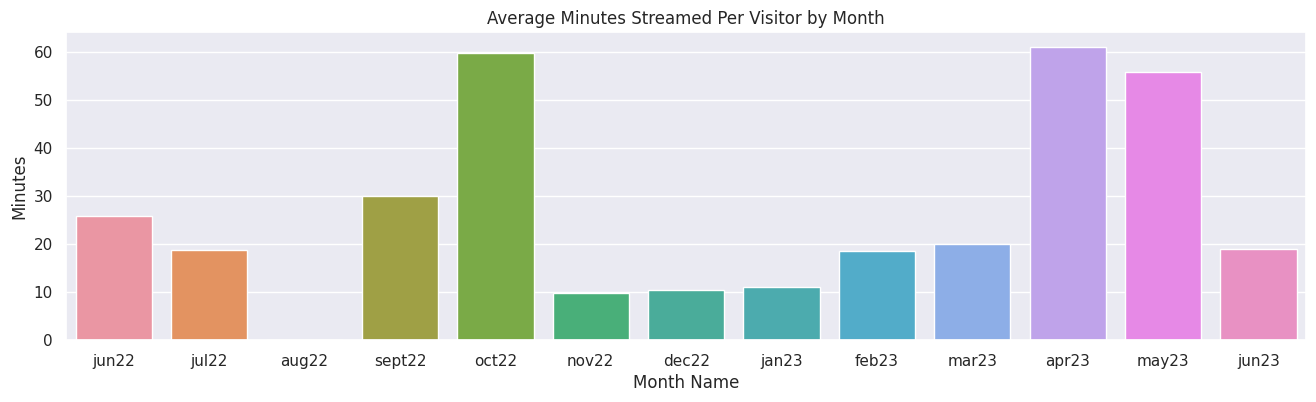

In [ ]:
ax = sns.barplot(data = monthlyData, x = 'monthName', y = 'avgMinPerVisitor')
ax.set(title = "Average Minutes Streamed Per Visitor by Month", xlabel = "Month Name", ylabel = "Minutes");

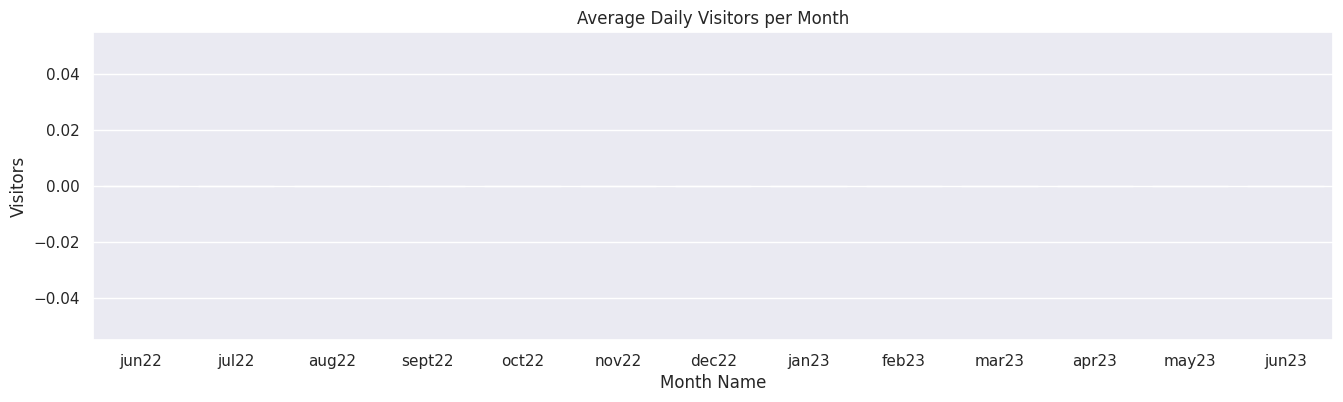

In [ ]:
ax = sns.barplot(data = monthlyData, x = 'monthName', y = 'avgDailyVisitors')
ax.set(title = "Average Daily Visitors per Month", xlabel = "Month Name", ylabel = "Visitors");

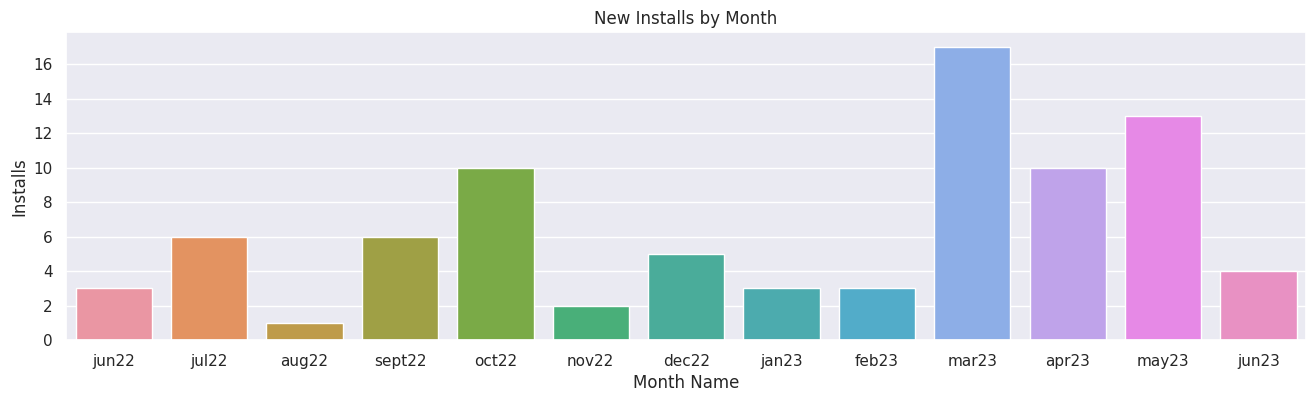

In [ ]:
ax = sns.barplot(data = monthlyData, x = 'monthName', y = 'newInstalls')
ax.set(title = "New Installs by Month", xlabel = "Month Name", ylabel = "Installs");

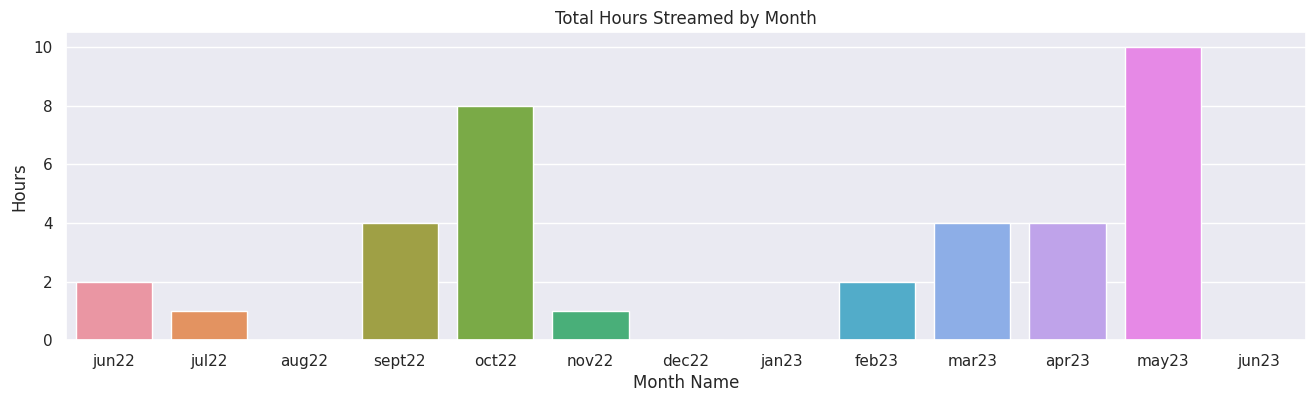

In [ ]:
ax = sns.barplot(data = monthlyData, x = 'monthName', y = 'totHoursStreamed')
ax.set(title = "Total Hours Streamed by Month", xlabel = "Month Name", ylabel = "Hours");

<Axes: xlabel='monthName', ylabel='netInstalls'>

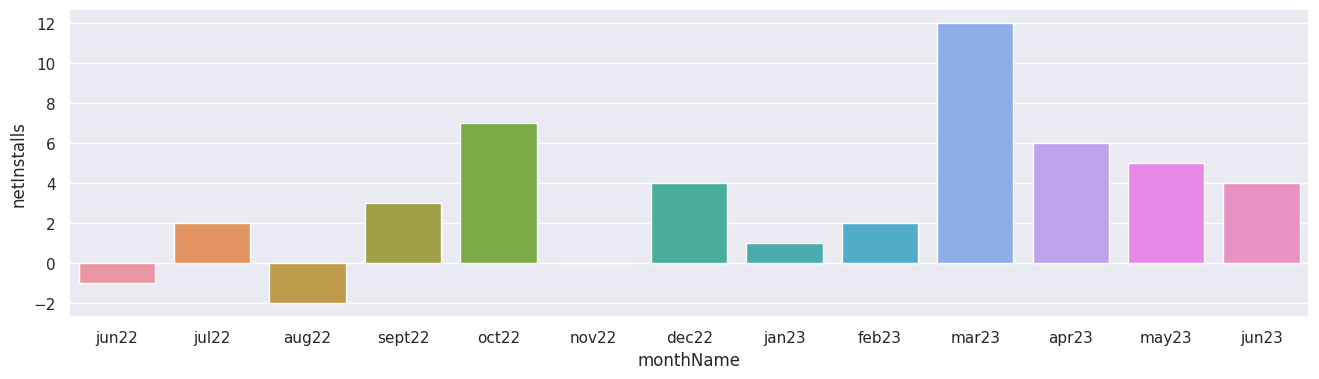

In [ ]:
sns.barplot(data = monthlyData, x = 'monthName', y = 'netInstalls')